# Classification of Spotify Song Popularity and Genre

### 1. Overview

The following report examines Spotify song data using classification analytic techniques. 

For classification, we cleaned the data by dropping missing values, scaled and explored it, then applied logistic regression, *KNeighborsClassifier*, support vector machines, *DecisionTreeClassifier*, *GradientBoosting Classifier*, and, in two parts, *RandomForestClassifier*.
    


In [37]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")


## 2. Classification Analysis

### 2.1 Pandas DataFrame: Logistic Regression, KNeighbors Classifier, Support Vector Machines, Decision Tree Classifier, Gradient Boosting Classifier, and Random Forest Classifier Part 1

In [58]:
## Loading dataset ...

df = pd.read_csv('CS98XClassificationTrain.csv')
print(df.shape)
df.head()

(453, 15)


,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


### 2.2 Data Exploration, Manipulation and Analysis

In [59]:
## Checking datatypes and missing values ...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


All the datatypes here seem appropirate for training the machine learning model. 

The target 'top genre' contains some missing values. We will drop these records as they will not be helpful in the training of any model.


Next, we remove rows containing missing values from the DataFrame.

*df* is a pandas DataFrame containing the spotify data, where one or more rows contain missing values.

*dropna()* is a method of the DataFrame class that removes any rows containing missing values (i.e., NaN or None values). This ensures that the data is clean.

*inplace=True* is an optional argument that modifies the DataFrame in place, meaning that the original DataFrame is changed and no new DataFrame is returned.

The purpose of removing rows with missing values is to clean the data before analysis or modeling. Missing data can cause issues with statistical analysis, and many machine learning algorithms cannot handle missing data. By removing rows with missing values, we ensure that our data is complete and ready for analysis or modeling.

It's important to note that dropping rows with missing values led to a reduction in the size of the dataset, which may affect the accuracy and reliability of any analysis or modeling that is performed on the data. However, we are confident that the remaining data is sufficient to predict and classify genres from the Spotify dataset. 

In [60]:
# Dropping missing values from the train dataset ...

df = df.dropna()
print(f"Missing values in the dataset now = {df.isna().sum().sum()}")  ## number of missing values in the dataset
df.shape


df.dropna(inplace=True)

Missing values in the dataset now = 0


In [61]:
# Data description:

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,438.0,NaN,NaN,NaN,227.600457,130.463047,1.0,116.25,226.5,340.75,453.0
title,438,436,Please Mr. Postman,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist,438,331,Elton John,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,438.0,NaN,NaN,NaN,1990.881279,16.697047,1948.0,1976.0,1993.0,2006.0,2019.0
bpm,438.0,NaN,NaN,NaN,118.326484,25.175735,62.0,100.0,120.0,133.0,199.0
nrgy,438.0,NaN,NaN,NaN,60.504566,22.08966,7.0,44.0,64.0,78.0,100.0
dnce,438.0,NaN,NaN,NaN,59.780822,15.404757,18.0,50.0,62.0,70.75,96.0
dB,438.0,NaN,NaN,NaN,-8.787671,3.591005,-24.0,-11.0,-8.0,-6.0,-1.0
live,438.0,NaN,NaN,NaN,17.605023,13.807492,2.0,9.0,13.0,23.0,93.0
val,438.0,NaN,NaN,NaN,59.625571,24.48016,6.0,42.25,61.0,80.0,99.0


From the above data description, we can deduce some facts about the dataset:

First, the target column has 86 distinct classes.

Additionally, there are 436 and 331 unique values for title and artist in the dataset. These features will have a little impact on the predictions for any model, so we can drop them, shown in the next code block. Id is also unique for each record, so we will drop that column as well.


We use the pandas library to get the number of unique values in the 'artist' column of the DataFrame df. The method *nunique()* returns the number of unique values in a column of a pandas DataFrame. So, *df['artist'].nunique()* returns the number of unique artists in the 'artist' column of the DataFrame df.

In other words, it tells how many different artists are represented in the 'artist' column of the DataFrame.

In [62]:
# Dropping columns that are not needed ...

df = df.drop(['Id', 'title', 'artist'], axis=1)
print(df.shape)
df.head()

(438, 12)


,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
2,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
5,2010,110,56,71,-7,12,23,223,15,6,74,pop


In [63]:
# Declaring features ...

features = ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']
data = df[features]
data.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1996,107,31,45,-8,13,28,150,75,3,44
2,1979,105,36,63,-9,13,67,245,11,3,77
3,1980,170,28,47,-16,13,33,232,25,3,67
4,1973,121,47,56,-8,15,40,193,45,3,63
5,2010,110,56,71,-7,12,23,223,15,6,74


Next, we create a heatmap visualization of the correlation matrix of a Pandas DataFrame called "df", where the cells in the heatmap are colored according to their correlation value:

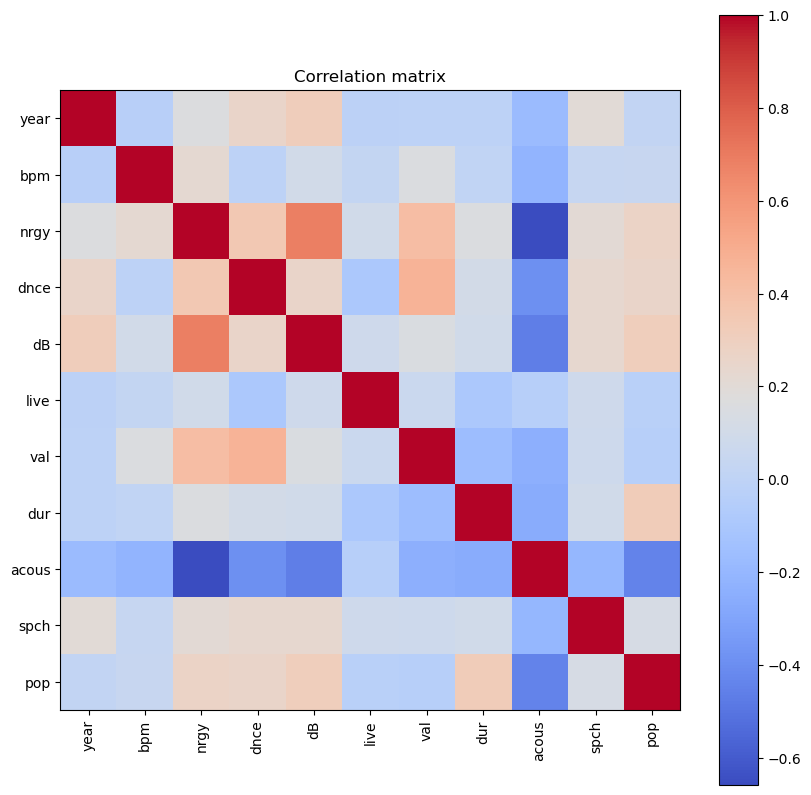

In [64]:
# Computing correlation matrix and plot it as a heatmap

corr = data.corr()
plt.figure(figsize=(10, 10))
plt.title('Correlation matrix')
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(features)), features, rotation=90)
plt.yticks(np.arange(len(features)), features)
plt.show()

The *corr()* method calculates the pairwise correlation between all columns in the DataFrame. 
The resulting correlation matrix is then passed to the *style.background_gradient()* method, which applies a color gradient to the cells based on their correlation value. 
The *cmap* parameter specifies the color map to use for the gradient; in this case, *coolwarm* is used.

Overall, we tried visualizing the correlation structure of a DataFrame and identifying patterns or relationships between its columns.

According to the correlation matrix plot, it doesn't appear that the dataset's features have any substantial linear correlations that would have a big impact on machine learning models. With the maximum correlation coefficients being around 0.6 or below, the heatmap visualisation demonstrates that the majority of pairwise correlations between the attributes are rather low. 

Although there are a few weak correlations between various features, none of them are significant enough to imply that any feature should be changed or eliminated in order to prevent multicollinearity problems. As a result, it appears that the features are largely independent and may be employed without significant worries regarding collinearity for classification analysis.

The majority of the characteristics appear to have roughly uniform distributions based on the visualisations of the feature distributions. These characteristics include year, bpm, dnce, and nrgy. But some characteristics seem to be skewed to the left or right. For instance, the distributions of the *dB*, *live*, *dur*, and *acous* attributes appear to be skewed.

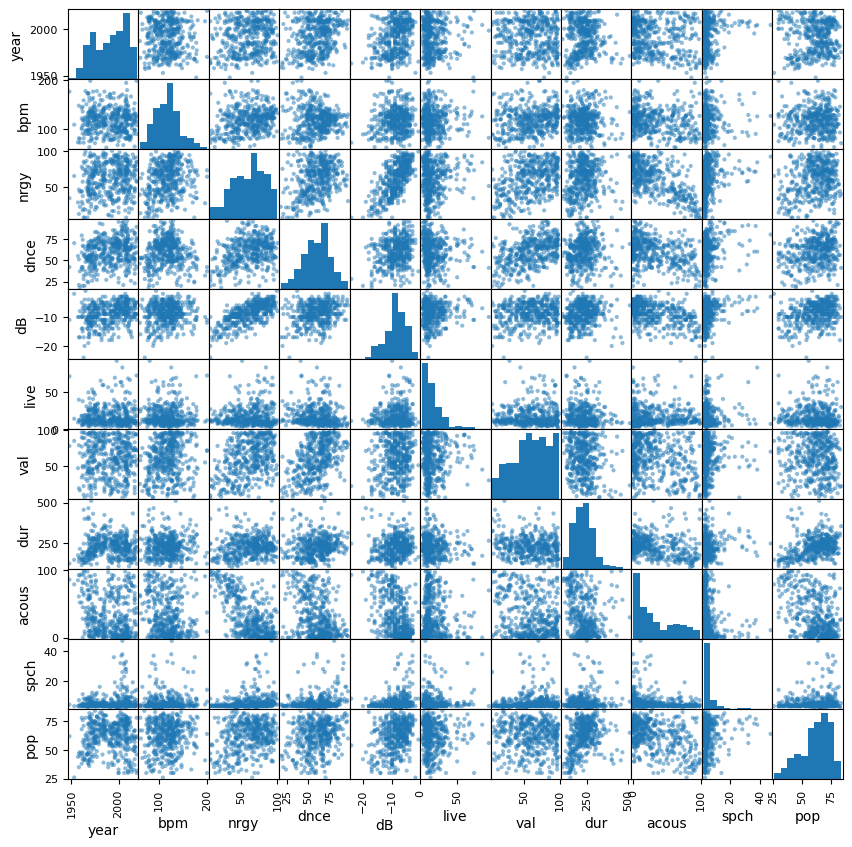

In [66]:
# Plotting pairwise scatterplots for all features

pd.plotting.scatter_matrix(data, figsize=(10, 10))
plt.show()

Finding any linear associations between the features as well as any potential outliers or clusters in the data can be done by looking at the above pairwise scatterplots of all the features. The scatterplot for two features that exhibit a strong positive or negative linear connection will clearly display a linear pattern, with the data points clustered closely around a straight line. 

We can see some linear associations in this representation, but by fusing this data with the correlation matrix from earlier, we can conclude that their strength is not very concerning in this situation.

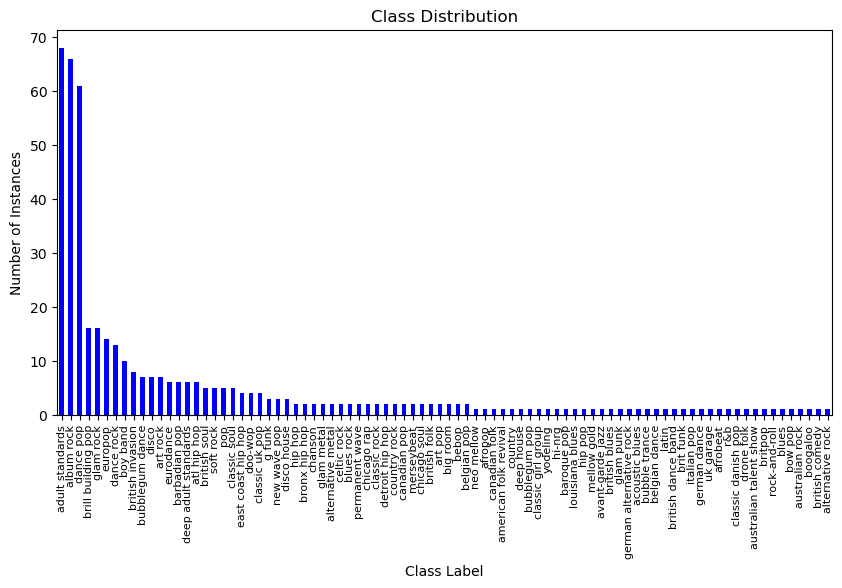

In [67]:
# Class distribution in target column

label = df['top genre']
class_counts = label.value_counts()
class_counts.plot(kind='bar', figsize=(10, 5), color='b')
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Number of Instances')
plt.xticks(fontsize=8)
plt.show()

The class distribution of the 'top genre' column in the dataset shows an imbalance in the frequency of different classes. The classes 'adult standards', 'album rock', and 'dance pop' constitute more than 190 records in total out of 438, while the other 83 classes are divided among the remaining columns. 

In addition, there is an imbalance in the number of records within the other classes, with labels such as 'alternative rock', 'british comedy', 'boogaloo', and others having only 1-2 records. This class imbalance can have an impact on the performance of machine learning algorithms, as they may have difficulty learning the minority classes due to the lack of data.

### 2.3 Loading the Test Dataset

In [68]:
test = pd.read_csv('CS98XClassificationTest.csv')
print(test.shape)
test.head()

(113, 14)


,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44


In [69]:
# Declaring X_test with feature variables ...

X_test = test.drop(['Id', 'title', 'artist'], axis=1)
X_test.info()  ## checking missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    113 non-null    int64
 1   bpm     113 non-null    int64
 2   nrgy    113 non-null    int64
 3   dnce    113 non-null    int64
 4   dB      113 non-null    int64
 5   live    113 non-null    int64
 6   val     113 non-null    int64
 7   dur     113 non-null    int64
 8   acous   113 non-null    int64
 9   spch    113 non-null    int64
 10  pop     113 non-null    int64
dtypes: int64(11)
memory usage: 9.8 KB


Since there are no missing values in X_train features, we can predict for each test record a label, once a model is trained.

### 2.4 Running Six Classification Models

In [70]:
# Declaring features and target variables ...

X = df[['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']]
y = df['top genre']

In [71]:
# Scaling the features ...

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test = scaler.transform(X_test)  ## transforming test feautures as well
X_scaled[:3]

array([[0.67605634, 0.32846715, 0.25806452, 0.34615385, 0.69565217,
        0.12087912, 0.23655914, 0.12590799, 0.75757576, 0.02222222,
        0.31034483],
       [0.43661972, 0.31386861, 0.31182796, 0.57692308, 0.65217391,
        0.12087912, 0.65591398, 0.3559322 , 0.11111111, 0.02222222,
        0.87931034],
       [0.45070423, 0.78832117, 0.22580645, 0.37179487, 0.34782609,
        0.12087912, 0.29032258, 0.32445521, 0.25252525, 0.02222222,
        0.70689655]])

#### 1.4.1 Logistic Regression

We were able to identify the most accurate model with a 34% accuracy score after conducting a grid search with cross-validation to determine the best hyperparameters for logistic regression. 

In order to determine the ideal set of hyperparameters for a particular model, the *GridSearchCV* function can be used to do a thorough search throughout a given hyperparameter space. *GridSearchCV* was utilised in our scenario to conduct a search across a variety of regularisation parameter C values and penalty configurations (l1 or l2). 

The model was subsequently trained using the best hyperparameters, and it showed a 34% accuracy on the test data.

In [72]:
# Finding optimal logisitic regression model using cross validation and grid search ...

params = {'C': [0.1, 1, 10, 100],
          'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(LogisticRegression(), params, cv=10, scoring='accuracy')
grid_search.fit(X_scaled, y)

print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validated accuracy:", grid_search.best_score_)

Best hyperparameters: {'C': 1, 'penalty': 'l2'}
Cross-validated accuracy: 0.34022198731501063


In [73]:
# Predicting the test records with optimal logistic regression model, after once training it on the whole dataset ...

clf = LogisticRegression(C=1, penalty='l2')
clf.fit(X_scaled, y)
y_pred = clf.predict(X_test)

## saving the predictions in a csv
test['top genre'] = y_pred
logreg_pred = test[['Id', 'top genre']]
logreg_pred.to_csv('predictions\logreg_pred.csv', index=False)

#### 1.4.2 KNeighbors Classifier

After using *GridSearchCV* again to determine which KNeighbors Classifier model is most appropriate, we train it on the given dataset in its entirety. 

We save the subsequent predictions in a .csv file. 

In [74]:
# Finding optimal kn classifier model using cross validation and grid search

params = {'n_neighbors': [3, 7, 15, 21, 25, 29, 35],
          'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(KNeighborsClassifier(), params, cv=10, scoring='accuracy')
grid_search.fit(X_scaled, y)

print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validated accuracy:", grid_search.best_score_)

Best hyperparameters: {'n_neighbors': 29, 'weights': 'distance'}
Cross-validated accuracy: 0.3334038054968288


In [75]:
# Predicting the test records with optimal knn classifier model, after once training it on the whole dataset ...

clf = KNeighborsClassifier(n_neighbors=29, weights='distance')
clf.fit(X_scaled, y)
y_pred = clf.predict(X_test)

# ... and saving the predictions in a csv ...

test['top genre'] = y_pred
logreg_pred = test[['Id', 'top genre']]
logreg_pred.to_csv('predictions\knn_pred.csv', index=False)

#### 1.4.3 Support Vector Machines

We do much the same with support vector machines here:

In [76]:
# Finding optimal svm classifier model using cross validation and grid search ...

params = {'C': [0.1, 1, 10, 100],
          'gamma': [1, 0.1, 0.01]}

grid_search = GridSearchCV(SVC(), params, cv=10, scoring='accuracy')
grid_search.fit(X_scaled, y)

print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validated accuracy:", grid_search.best_score_)

Best hyperparameters: {'C': 10, 'gamma': 0.1}
Cross-validated accuracy: 0.34233615221987324


In [77]:
# Predicting the test records with optimal svm classifier model, after once training it on the whole dataset ...

clf = SVC(C=10, gamma=0.1)
clf.fit(X_scaled, y)
y_pred = clf.predict(X_test)

# ... and saving the predictions in a csv ...
test['top genre'] = y_pred
logreg_pred = test[['Id', 'top genre']]
logreg_pred.to_csv('predictions\svm_pred.csv', index=False)

#### 1.4.4 Decision Tree Classifier

... as well as with *DecisionTreeClassifier* here:

In [78]:
# Finding optimal decision tree classifier model using cross validation and grid search ...

params = {"splitter":["best", "random"],
          "max_depth" : [1, 3, 5, 7, 9, 11],
          "min_samples_leaf":[1, 2, 3, 5, 7, 9,]}

grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=10, scoring='accuracy')
grid_search.fit(X_scaled, y)

print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validated accuracy:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 7, 'splitter': 'random'}
Cross-validated accuracy: 0.3035940803382664


In [79]:
# Predicting the test records with optimal svm classifier model, after once training it on the whole dataset ...

clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, splitter='random')
clf.fit(X_scaled, y)
y_pred = clf.predict(X_test)

# ... and saving the predictions in a csv ...
test['top genre'] = y_pred
logreg_pred = test[['Id', 'top genre']]
logreg_pred.to_csv('predictions\dt_pred.csv', index=False)

#### 1.4.5 Gradient Boosting Classifier

... and *GradientBoostingClassifier* here:

In [ ]:
# Finding optimal gradient boosting classifier model using cross validation and grid search ...

params = {'max_depth': [5, 10, 20],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [1000, 2000]}

grid_search = GridSearchCV(GradientBoostingClassifier(), params, cv=3, scoring='accuracy')
grid_search.fit(X_scaled, y)

print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validated accuracy:", grid_search.best_score_)

In [ ]:
# Predicting the test records with optimal gradient boosting classifier model, after once training it on the whole dataset ...

clf = GradientBoostingClassifier(max_depth=5, min_samples_split=5, n_estimators=1000)
clf.fit(X_scaled, y)
y_pred = clf.predict(X_test)

# ... and saving the predictions in a csv ...
test['top genre'] = y_pred
logreg_pred = test[['Id', 'top genre']]
logreg_pred.to_csv(r'predictions\gb_pred.csv', index=False)

#### 1.4.6 Random Forest Classifier

However, we found *RandomForestClassifier* the most effective. 

In this first approach, we followed the same steps as for the less optimal models above:

In [ ]:
# Finding optimal random forest classifier model using cross validation and grid search ...

params = {'max_depth': [5, 10, 20, None],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [500, 1000, 1500, 2000]}

grid_search = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validated accuracy:", grid_search.best_score_)

In [ ]:
# Predicting the test records with optimal random forest classifier model, after once training it on the whole dataset ...

clf = RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=1000)
clf.fit(X_scaled, y)
y_pred = clf.predict(X_test)

## saving the predictions in a csv
test['top genre'] = y_pred
logreg_pred = test[['Id', 'top genre']]
logreg_pred.to_csv(r'predictions\rf_pred.csv', index=False)

In this part of the project, we used machine learning to categorise music from Spotify into several categories. We loaded the training dataset, removed columns that were not needed, and deleted entries with missing values. 

Using logistic regression, KNN classifier, SVM classifier, decision tree classifier, random forest classifier, and gradient boosting classifier, six best models were then developed for the scaled dataset. Grid Search Cross Validation was used to refine each model and identify the best hyperparameters. 

The scores for each model's cross-validation accuracy were 34, 33, 34, 31, 35, and 22, respectively. We were unable to assess the true accuracy of our models because we lacked the labels for the test data. 

Each of these models was used to load the test dataset and predict the labels. The predictions were then saved as a CSV file and submitted to the Kaggle competition. 

Overall, our research indicates that the random forest classifier was the best model for categorising the songs into various genres.